<a href="https://colab.research.google.com/github/codebuzz01/codebuzz_gitquest/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression with Python

In this challenge, we will be trying estimate the BMI based on the Gender, Height & Weight.
The complexity arises due the fact that dataset has less samples, & is highly imbalanced.

This data frame contains the following columns:

Gender : Male / Female

Height : Number (cm)

Weight : Number (Kg)

Index :
0 - Extremely Weak


1 - Weak


2 - Normal


3 - Overweight


4 - Obesity


5 - Extreme Obesity

## Step 1: Getting your data

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
# Please upload the bmi.csv that you have downloaded
from google.colab import files 
uploaded = files.upload()

Saving bmi.csv to bmi.csv


In [ ]:
import io
 
df = pd.read_csv(io.BytesIO(uploaded['bmi.csv']))

In [ ]:
df.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


In [ ]:
df.describe()

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


In [ ]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
Index     0
dtype: int64

In [ ]:
df[df.duplicated(keep=False)]

,Gender,Height,Weight,Index
3,Female,195,104,3
8,Male,174,90,3
72,Male,141,80,5
138,Male,171,147,5
141,Female,167,85,4
156,Female,182,84,3
181,Male,177,117,4
187,Female,182,84,3
217,Female,142,86,5
242,Male,191,62,1


In [ ]:
for index in df[df.duplicated()].index:
    df.drop(index,inplace=True)

In [ ]:
df.reset_index(drop=True,inplace=True)

## Step 2: EDA

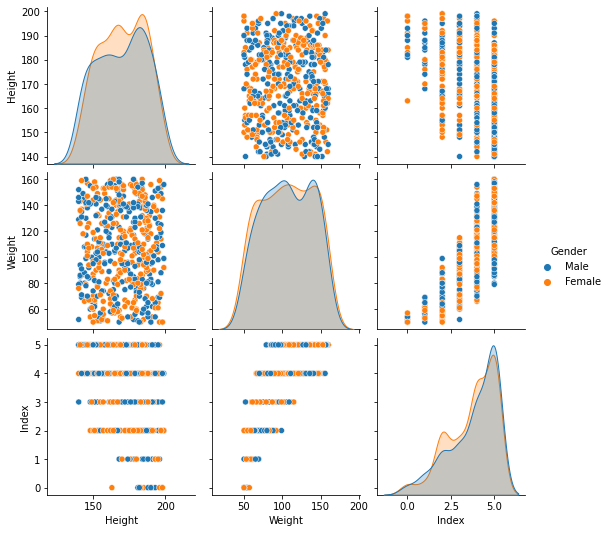

In [ ]:
sns.pairplot(df,hue='Gender')

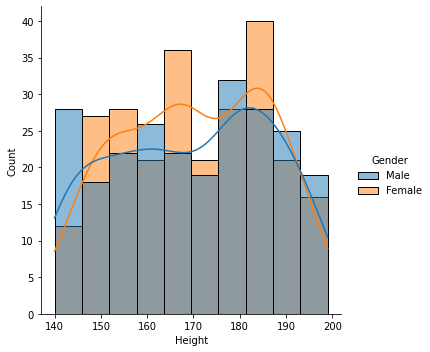

In [ ]:
sns.displot(x='Height', hue='Gender',data=df,kde=True)

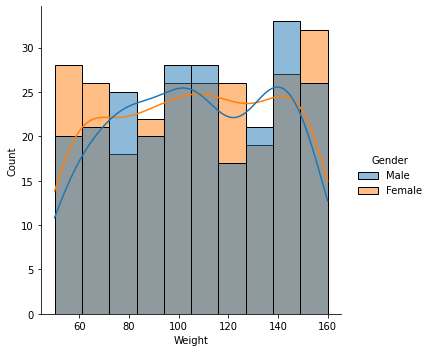

In [ ]:
sns.displot(x='Weight', hue='Gender',data=df,kde=True)

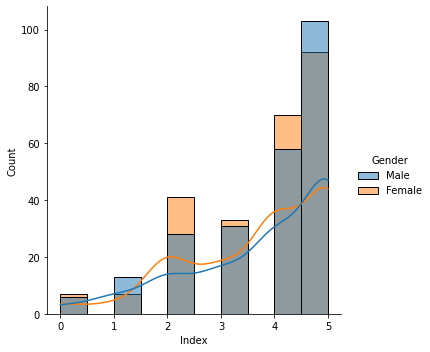

In [ ]:
sns.displot(x='Index', hue='Gender',data=df,kde=True)

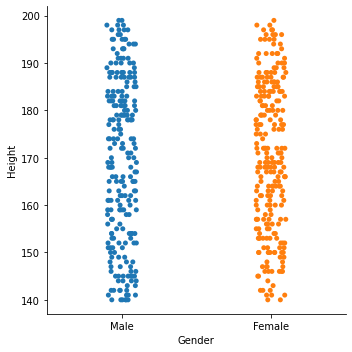

In [ ]:
sns.catplot(x='Gender',y='Height',data=df)

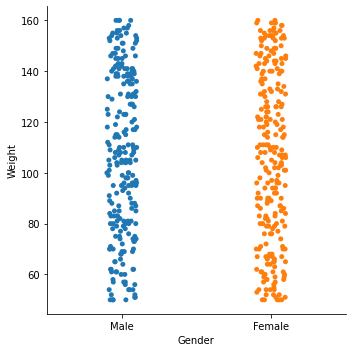

In [ ]:
sns.catplot(x='Gender',y='Weight',data=df)

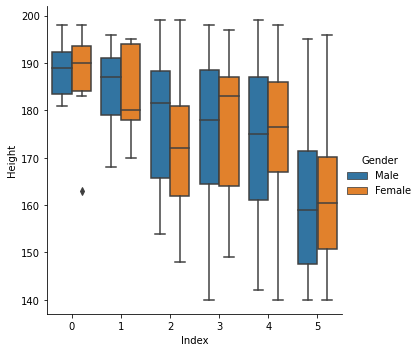

In [ ]:
sns.catplot(x='Index',y='Height',hue='Gender',kind='box',data=df)

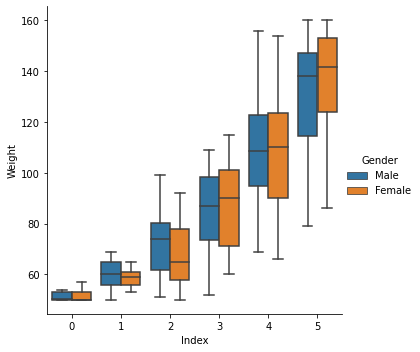

In [ ]:
sns.catplot(x='Index',y='Weight',hue='Gender',kind='box',data=df)

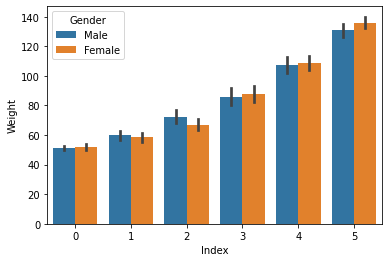

In [ ]:
sns.barplot(x="Index",y="Weight",hue='Gender',data=df)

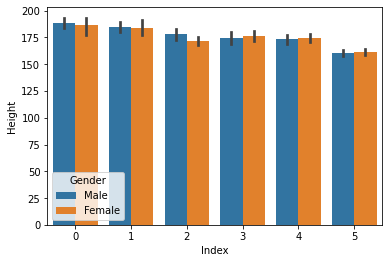

In [ ]:
sns.barplot(x="Index",y="Height",hue='Gender',data=df)

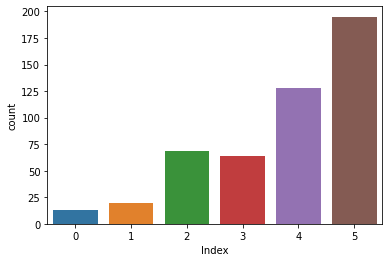

In [ ]:
sns.countplot(x='Index',data=df)

## Step 3: Feature Engineering

In [ ]:
df['Index'] = df['Index'].map({0:0,
                               1:0,
                               2:0,
                               3:1,
                               4:1,
                               5:1})

In [ ]:
gender = pd.get_dummies(df['Gender'],drop_first=True)

In [ ]:
df.head()

,Gender,Height,Weight,Index
0,Male,174,96,1
1,Male,189,87,0
2,Female,185,110,1
3,Female,195,104,1
4,Male,149,61,1


In [ ]:
df = pd.concat([df,gender],axis=1)

In [ ]:
df.drop(columns=['Gender'],inplace=True)

In [ ]:
df.head()

,Height,Weight,Index,Male
0,174,96,1,1
1,189,87,0,1
2,185,110,1,0
3,195,104,1,0
4,149,61,1,1


## Step 4: Modeling and Training

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
df['Index'].value_counts(normalize=True)

1    0.791411
0    0.208589
Name: Index, dtype: float64

In [ ]:
# Train test split
X = df[['Male','Weight','Height']]
y = df['Index']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

In [ ]:
log = LogisticRegression()
log.fit(X_train, y_train)

LogisticRegression()

In [ ]:
log.score(X_train, y_train)

0.9694189602446484

In [ ]:
log.score(X_test, y_test)

0.9814814814814815

## Step 5: Interpretations and Predictions

In [ ]:
pd.DataFrame(log.coef_[0], index=X.columns)

,0
Male,0.465441
Weight,0.309205
Height,-0.260087


In [ ]:
log.predict_proba(X_test)

array([[2.41634574e-06, 9.99997584e-01],
       [1.38249264e-07, 9.99999862e-01],
       [1.75726100e-12, 1.00000000e+00],
       [5.73482148e-05, 9.99942652e-01],
       [2.41101583e-10, 1.00000000e+00],
       [9.99305914e-01, 6.94086341e-04],
       [5.18705567e-09, 9.99999995e-01],
       [6.61734775e-08, 9.99999934e-01],
       [9.98926535e-01, 1.07346524e-03],
       [5.67884624e-01, 4.32115376e-01],
       [1.38490526e-04, 9.99861509e-01],
       [5.27000665e-12, 1.00000000e+00],
       [4.12248014e-12, 1.00000000e+00],
       [1.39273237e-04, 9.99860727e-01],
       [1.80206228e-09, 9.99999998e-01],
       [9.54030755e-01, 4.59692454e-02],
       [1.22548638e-11, 1.00000000e+00],
       [5.42775040e-06, 9.99994572e-01],
       [3.00295082e-02, 9.69970492e-01],
       [3.62998520e-12, 1.00000000e+00],
       [2.40281886e-06, 9.99997597e-01],
       [9.18258325e-06, 9.99990817e-01],
       [7.01479423e-07, 9.99999299e-01],
       [5.31425999e-01, 4.68574001e-01],
       [2.255425

In [ ]:
log.predict(X_test)

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1])

In [ ]:
# Evaluation
from sklearn.metrics import classification_report, confusion_matrix, plot_roc_curve

In [ ]:
predictions = log.predict(X_test)

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        39
           1       1.00      0.98      0.99       123

    accuracy                           0.98       162
   macro avg       0.96      0.99      0.98       162
weighted avg       0.98      0.98      0.98       162



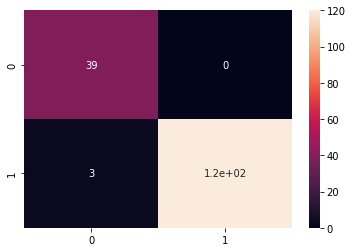

In [ ]:
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


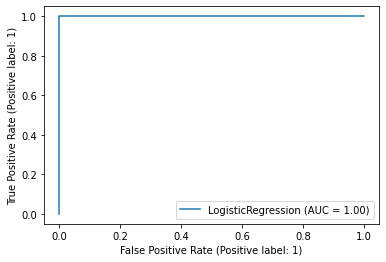

In [ ]:
plot_roc_curve(log, X_test, y_test)